In [1]:
import os
from glob import glob
import numpy as np
from scipy import ndimage, stats
import matplotlib.pyplot as plt

import rasterio
from rasterio import features
from rasterio.plot import show, plotting_extent

import cv2

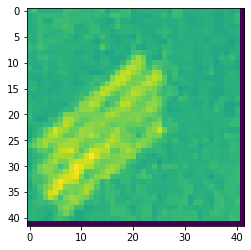

C:/EAGLE/trace_gfz/tile_analysis/sample/input/net\net_060.tif


In [2]:
path_input = "C:/EAGLE/trace_gfz/tile_analysis/sample/input/net"  

# List all images
tiles = glob(os.path.join(path_input, '*'))

# Read image
with rasterio.open(tiles[60]) as src:
    img = src.read()
    kwargs = src.meta.copy()
    
show(img[0])
print(tiles[60])

### Using CV2 "ostu"-filter

***Note: "CV2" modul cannot georeference images***

In [3]:
# Read the fist band of image
img = cv2.imread(tiles[60],0)

In [4]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

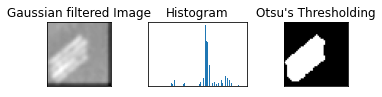

In [5]:
# plot all the images and their histograms
images = [#img, 0, th1,
          #img, 0, th2,
          blur, 0, th3]
titles = [#'Original Noisy Image','Histogram','Global Thresholding (v=127)',
          #'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.subplot(3,3,1),plt.imshow(images[0],'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2),plt.hist(images[0].ravel(),256)
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3),plt.imshow(images[2],'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])
    
plt.show()

In [6]:
# Write
folder_output = "C:/EAGLE/trace_gfz/tile_analysis/sample/output/otsuFilter/net"
new_name = tiles[60].split(".")[0].split("\\")[-1]+"_ostu"+".tif"
path_output = os.path.join(folder_output, new_name)
cv2.imwrite(path_output, th3)

True